## Tentang Dataset

Dataset ini berisi informasi tentang penjualan tiket dan perilaku customer pada bioskop, seperti demografi, preferensi genre film, pemilihan kursi, harga tiket, dan pola retensi pelanggan.

Sumber data : https://www.kaggle.com/datasets/himelsarder/cinema-hall-ticket-sales-and-customer-behavior/data



---



## Import Library

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC

## Import Data

In [4]:
data = pd.read_csv("/content/cinema_hall_ticket_sales.csv")
data.head()

,Ticket_ID,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
0,N4369,55,12.27,Comedy,Standard,7,No
1,B8091,35,19.02,Drama,Standard,Alone,Yes
2,V6341,55,22.52,Horror,VIP,3,No
3,B3243,53,23.01,Drama,Standard,6,Yes
4,I3814,30,21.81,Comedy,VIP,4,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ticket_ID         1440 non-null   object 
 1   Age               1440 non-null   int64  
 2   Ticket_Price      1440 non-null   float64
 3   Movie_Genre       1440 non-null   object 
 4   Seat_Type         1440 non-null   object 
 5   Number_of_Person  1440 non-null   object 
 6   Purchase_Again    1440 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 78.9+ KB


In [6]:
data['Purchase_Again'].value_counts()

,count
Purchase_Again,
No,733
Yes,707


# **Exploratory Data Analysis**

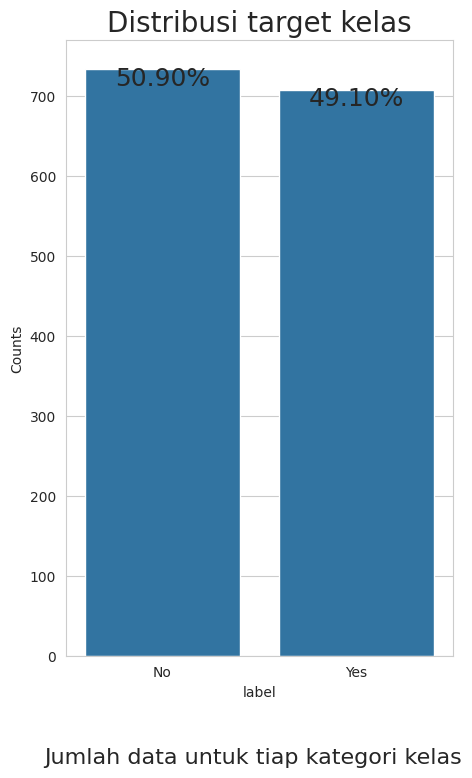

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize = (5,8))
ax = sns.countplot(x='Purchase_Again',data=data, dodge = False)

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2.,
            height_l -20, '{0:.2%}'.format(height_l/total), ha="center", fontsize = 18)
    ax.text(right.get_x() + right.get_width()/2.,
            height_r -20, '{0:.2%}'.format(height_r/total), ha="center", fontsize = 18)


plt.xlabel("label")
plt.ylabel("Counts")
plt.title("Distribusi target kelas", fontsize = 20)
plt.figtext(0.5,-0.025,"Jumlah data untuk tiap kategori kelas", fontsize = 16, ha = 'center')
plt.show()

In [8]:
data['Number_of_Person']=data['Number_of_Person'].str.replace("Alone","1")
data['Number_of_Person']=pd.to_numeric(data['Number_of_Person'])
data = data.drop(['Ticket_ID','Movie_Genre', 'Seat_Type'], axis=1)

In [9]:
data['Age'].min()

18

In [10]:
data['Age'].max()

60

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1440 non-null   int64  
 1   Ticket_Price      1440 non-null   float64
 2   Number_of_Person  1440 non-null   int64  
 3   Purchase_Again    1440 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 45.1+ KB


## Pembagian dataset

In [12]:
data.head()

,Age,Ticket_Price,Number_of_Person,Purchase_Again
0,55,12.27,7,No
1,35,19.02,1,Yes
2,55,22.52,3,No
3,53,23.01,6,Yes
4,30,21.81,4,Yes


In [13]:
X = data.drop('Purchase_Again', axis=1)
y = data['Purchase_Again']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [15]:
y_train_df = pd.DataFrame(y_train)
# y_train_df.head()
print("Jumlah training data :", len(y_train))
print("Jumlah data berlabel Yes :", y_train_df.value_counts()[1])
print("Jumlah data berlabel No  :",y_train_df.value_counts()[0])

Jumlah training data : 1152
Jumlah data berlabel Yes : 568
Jumlah data berlabel No  : 584


<ipython-input-15-2022229b119e>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Jumlah data berlabel Yes :", y_train_df.value_counts()[1])
<ipython-input-15-2022229b119e>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Jumlah data berlabel No  :",y_train_df.value_counts()[0])


## Training dan testing model prediksi

### **Model Random forest**

In [16]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
rf_score = accuracy_score(y_test, rf_pred)
print('Random forest accuracy Score:', rf_score)

Random forest accuracy Score: 0.4618055555555556


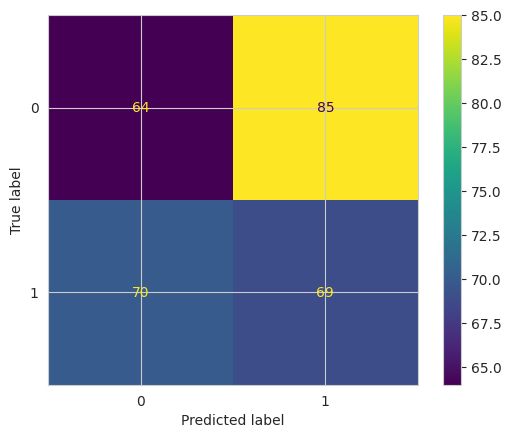

In [17]:
cm_rf = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.show()

### **Model K-Nearest neighbor**

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
knn_score = accuracy_score(y_test, knn_pred)
print('KNN accuracy Score:', knn_score)

KNN accuracy Score: 0.5


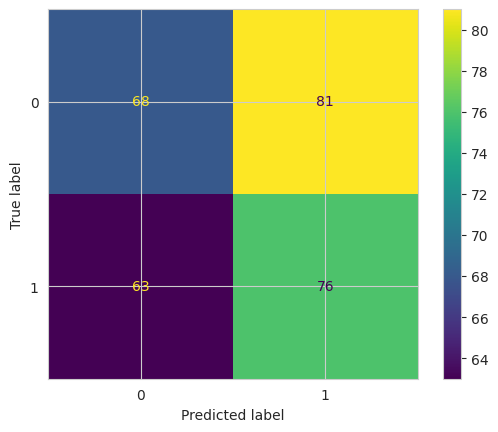

In [19]:
cm_knn = confusion_matrix(y_test, knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.show()

### **Model Support vector machine**

In [20]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
svm_score = accuracy_score(y_test, svm_pred)
print('KNN accuracy Score:', svm_score)

KNN accuracy Score: 0.4791666666666667


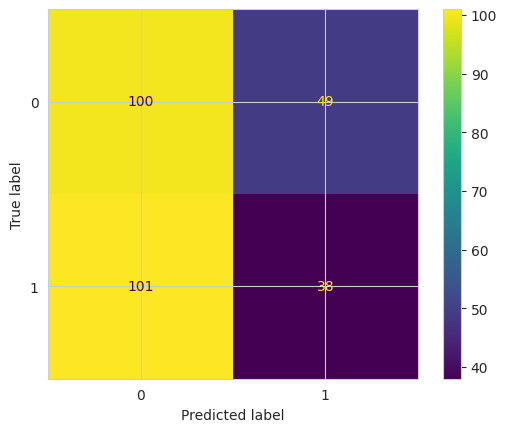

In [21]:
cm_svm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.show()